In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv("Book1.csv",encoding = "ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
x = df['v2'].values
y = df['v1'].values

In [6]:
df['v1'].value_counts(normalize=True)

v1
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

In [7]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [8]:
df['v2'][1]

'Ok lar... Joking wif u oni...'

In [9]:
df['v2'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [10]:
df['v2'][1000]

'No..but heard abt tat..'

In [11]:
import nltk

In [12]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stop_words = stopwords.words('english')

In [13]:
snow = SnowballStemmer('english')

In [14]:
import re

In [15]:

text =[]

for message in df['v2']:
    message = message.lower().strip()
    cleaner = re.compile('<.*?>')
    message = re.sub(cleaner, ' ', message) 
    message = re.sub(r"[^a-zA-Z0-9]"," ", message)
    message = re.sub(r'\d+', '',message)
    words = [snow.stem(word) for word in message.split() if word not in stopwords.words('english')] 
    text.append(' ' .join(words))

In [16]:
text[100]

'okay name ur price long legal wen pick u ave x am xx'

In [17]:
text[1000]

'heard abt tat'

In [18]:
text[500]

'fight world easi u either win lose bt fightng close u dificult u lose u lose u win u still lose'

In [19]:
count_vect = CountVectorizer(max_features=5000)
bow_data = count_vect.fit_transform(text).toarray()
print(bow_data[1])

[0 0 0 ... 0 0 0]


In [20]:
count_vect.get_feature_names_out()[:10]

array(['aa', 'aah', 'aaniy', 'aaooooright', 'aathi', 'ab', 'abbey',
       'abdomen', 'abeg', 'abel'], dtype=object)

In [21]:
tf_idf = TfidfVectorizer()
tf_data = tf_idf.fit_transform(text).toarray()
tf_data.shape

(5572, 6275)

In [22]:
tf_idf.get_feature_names_out()[:10]

array(['aa', 'aah', 'aaniy', 'aaooooright', 'aathi', 'ab', 'abbey',
       'abdomen', 'abeg', 'abel'], dtype=object)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(bow_data,y)


In [24]:
x_train.shape

(4179, 5000)

In [25]:
y_train.shape

(4179,)

In [26]:
lr_bow = LogisticRegression(class_weight='balanced')
lr_bow.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [27]:
y_pred = lr_bow.predict(x_test)
print('acc:',accuracy_score(y_test,y_pred))

acc: 0.9820531227566404


In [28]:
print('train-acc:',accuracy_score(y_train,lr_bow.predict(x_train)))

train-acc: 0.9973677913376405


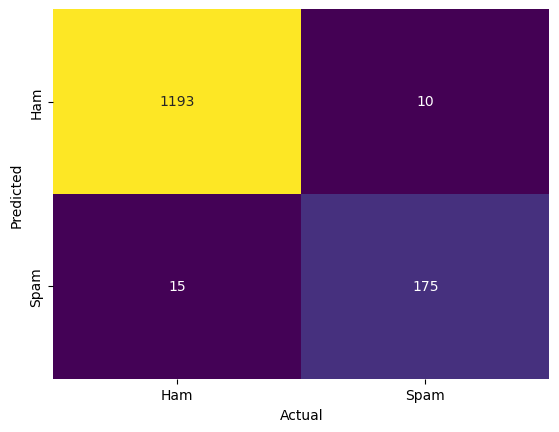

In [29]:
cm = confusion_matrix(y_test,y_pred)
c_df = pd.DataFrame(data=cm,columns=['Ham','Spam'], index=['Ham','Spam'])
sns.heatmap(c_df,annot=True, cbar=False,fmt='d',cmap='viridis') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [30]:
x_train,x_test,y_train,y_test = train_test_split(tf_data,y)

In [31]:
x_train.shape

(4179, 6275)

In [32]:
y_test.shape

(1393,)

In [33]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [34]:
print('acc:',accuracy_score(y_test,y_pred))
print('train-acc:',accuracy_score(y_train,lr.predict(x_train)))

acc: 0.9806173725771715
train-acc: 0.9885139985642498


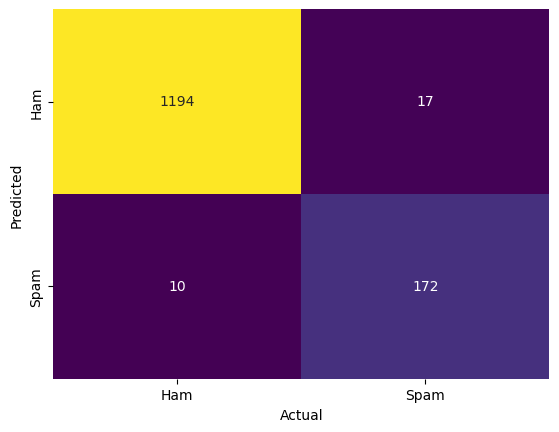

In [35]:
cm = confusion_matrix(y_test,y_pred)
c_df = pd.DataFrame(data=cm,columns=['Ham','Spam'], index=['Ham','Spam'])
sns.heatmap(c_df,annot=True, cbar=False,fmt='d',cmap='viridis') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [36]:
msg = 'hello'.lower()


In [37]:
b = count_vect.transform([msg]).toarray()

In [38]:
b.shape

(1, 5000)

In [39]:
lr_bow.predict(b)[0]

'ham'

In [40]:
msg = 'There’s an issue with your payment information from your recent order [124578963]. Take action now: [https://blog.textingbase.com/how-to-identify-spam-text-messages]'.lower()

In [41]:
c = count_vect.transform([msg]).toarray()

In [42]:
lr_bow.predict(c)[0]

'spam'

In [43]:
c.shape


(1, 5000)